In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

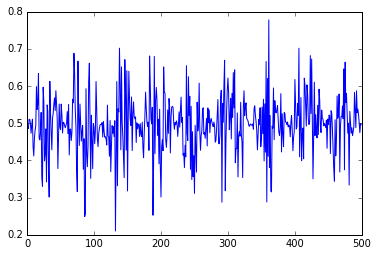

In [4]:
n = 10000 
ts_len = 500

phases = np.array(np.random.randint(0, 50, [n, 2]))
pure = np.sin([np.linspace(-np.pi * x[0], -np.pi * x[1], ts_len) for x in phases])
noise = np.array([np.random.normal(0, 1, ts_len) for x in range(n)])

signals = pure * noise
           
# Normalize everything between 0 and 1
signals += np.abs(np.min(signals))
signals /= np.max(signals)

plt.plot(signals[0])

In [3]:
def euclid_dist(t1, t2):
         return np.sqrt(((t1-t2)**2).sum())
def k_means(data, num_clust, num_iter):
    centroids = signals[np.random.randint(0, signals.shape[0], num_clust)]

    for n in range(num_iter): 
        assignments={}
        for ind, i in enumerate(data):
            min_dist = float('inf') 
            closest_clust = None
            for c_ind, j in enumerate(centroids):
                dist = euclid_dist(i, j) 
                if dist < min_dist:
                   min_dist = dist
                   closest_clust = c_ind

            if closest_clust in assignments: 
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[] 
                assignments[closest_clust].append(ind)

        for key in assignments:
            clust_sum = 0
            for k in assignments[key]: 
                clust_sum = clust_sum + data[k]
            centroids[key] = [m / len(assignments[key]) for m in clust_sum] 

    return centroids

In [ ]:
t1 = time.time()
centroids = k_means(signals, 100, 100)
t2 = time.time()
print("Took {} seconds".format(t2 - t1))

In [5]:
def euclid_dist(t1, t2):
    return np.sqrt(((t1-t2)**2).sum(axis = 1))

def calc_centroids(data, centroids):
    dist = np.zeros([data.shape[0], centroids.shape[0]])

    for idx, centroid in enumerate(centroids): 
        dist[:, idx] = euclid_dist(centroid, data)

    return np.array(dist)

def closest_centroids(data, centroids): 
    dist = calc_centroids(data, centroids) 
    return np.argmin(dist, axis = 1)

def move_centroids(data, closest, centroids):
    k = centroids.shape[0]
    new_centroids = np.array([data[closest == c].mean(axis = 0) for c in np.unique(closest)])

    if k - new_centroids.shape[0] > 0:
       print("adding {} centroid(s)".format(k - new_centroids.shape[0]))
       additional_centroids = data[np.random.randint(0, data.shape[0], k - new_centroids.shape[0])] 
       new_centroids = np.append(new_centroids, additional_centroids, axis = 0)

    return new_centroids

def k_means(data, num_clust, num_iter):
    centroids = signals[np.random.randint(0, signals.shape[0], num_clust)]
    last_centroids = centroids

    for n in range(num_iter):
        closest = closest_centroids(data, centroids)
        centroids = move_centroids(data, closest, centroids)
        if not np.any(last_centroids != centroids):
           print("early finish!")
           break
        last_centroids = centroids 
    
    return centroids

In [6]:
t1 = time.time()
centroids = k_means(signals, 100, 100)
t2 = time.time()
print("Took {} seconds".format(t2 - t1))

adding 1 centroid(s)
early finish!
Took 5.983506917953491 seconds
